In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib widget
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png', 'pdf')


In [2]:
font = {'size'   : 12}
matplotlib.rc('figure',figsize = (6, 4))
matplotlib.rc('font',**font)#viewing on computer screen
"""font = {'size'   : 8}
pylab.rc('figure',figsize = (3, 2),dpi=140)
pylab.rc('font',**font) #printing""";

In [3]:
from astropy.coordinates import SkyCoord

In [4]:
j1000coord = SkyCoord('10h00m36.01s +02d08m22.4s', frame='icrs')
j1000coord.icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (150.15004167, 2.13955556)>

In [5]:
import pandas as pd
plt.rcParams['figure.constrained_layout.use'] = True

In [6]:
specdata=pd.read_csv("../data/oi_sdssj1000_spectrumdata_machine_readable.csv",
           header=0, skiprows=[1]) # obs_wavelength = 178.56 um / z=1.826
v_all = specdata['v']-154.09 # so that the reference v=0 corresponds to z=1.8275 like my other spectra. see images nb
s_all = specdata['s']*1000
e_all = specdata['serr']*1000
s_gauss = specdata['smod']*1000
v_gauss = specdata['vmod']-154.09
in_sum = specdata['insum']==1




In [7]:
v_all[1]-v_all[0]

103.22751999999991

In [8]:
# plt.style.use("dark_background")
# plt.rcParams.update({
#     "text.usetex": True,
#     "text.latex.preamble": "\\usepackage[lf]{ebgaramond}\\usepackage{ebgaramond-maths}",
#     "font.family": "EBGaramond"
# }) If you're feeling FANCY...

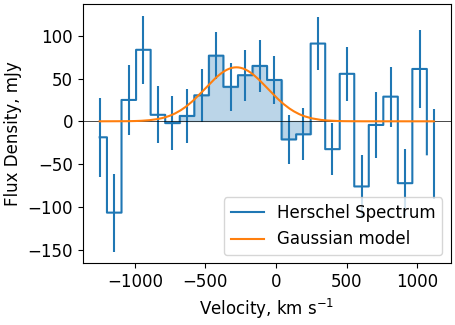

In [9]:
plt.figure(figsize=(3.5*1.3,2.5*1.3))
line=plt.step(v_all,s_all,where='mid',label="Herschel Spectrum")
linecolor = line[0].get_c()
plt.errorbar(v_all,
             s_all,
             e_all,
             fmt='none',
             ecolor=linecolor)
             
plt.axhline(y=0,color='k',linewidth=0.5)
x_incl=v_all[in_sum]
y_incl=s_all[in_sum]
z=np.zeros(len(y_incl))
plt.xlabel("Velocity, km s$^{-1}$")
plt.ylabel("Flux Density, mJy")
#plt.fill_between(x,y,z,step="mid",color="C0",alpha=0.3)
v_spec=v_all[np.isfinite(v_all)]
spec_fill_indices=np.repeat(x_incl.index,2)
spec_fill_indices+=[-0.5 if i%2==0 else 0.5 for i in range(len(spec_fill_indices))]
x=np.interp(spec_fill_indices,v_spec.index,v_spec)
y=np.repeat(y_incl,2)
plt.fill_between(x,y,np.zeros(len(y)),color="C0",alpha=0.3)
plt.plot(v_gauss,s_gauss,label="Gaussian model")
plt.legend(loc=4)

In [10]:
plt.close("all")